## Mahyar Mohammadi Matin-610398166 - AntColony

In [3]:
import numpy as np
import pandas as pd
import multiprocess as mp

In [48]:
def openFile(fileName):
    file = open(fileName,'r')
    inp = file.read()
    file.close()
    costs = []
    for row in inp.split('\n'):
        if(row.split()):costs.append(list(map(int,row.split())))
    pheromones = [[0.4 for _ in range(len(costs))]for _ in range(len(costs))]
    
    return costs,pheromones

In [9]:
class Ant:
    path=np.array([])
    pathCost=0
    def findFood(self):
        self.path=np.array([-1]*len(costs))
        self.pathCost=0
        agents = range(len(costs))
        tasks = pd.Series([True]*len(costs))
        #tasks[tasks].index are the remaining tasks
        for i in range(len(agents)):
            agent=agents[i]
            pherPoints = [(pheromones[agent][task]**alpha)*(1/costs[agent][task]**beta) 
                          for task in tasks[tasks].index]
            probs = [pherPoint/sum(pherPoints) for pherPoint in pherPoints]
            task = np.random.choice(tasks[tasks].index,p=probs)
            tasks[task]=False
            self.path[i]=task
            self.pathCost += costs[agent][task]
        
        return (self.path,self.pathCost)
        
    def returnHome(self,pherAddRate):
        agent=0
        for task in self.path:
            pheromones[agent][task] += pherAddRate/self.pathCost
            agent+=1
            
        return

In [103]:
def run(antCount = 2,evapRate = 5,pherAddRate=1,iters=200):
    ants = [Ant() for _ in range(antCount)]
    bestPath = list(range(len(costs)))
    bestCost = sum([costs[i][i] for i in range(len(costs))])
    itersMin = []
    itersMean = []
    itersMax = []
    bests = []

    for i in range(iters):
        pathCosts = []
        for ant in ants:
            path,pathCost = ant.findFood()
            pathCosts.append(pathCost)
            if(pathCost<bestCost):
                bestCost=pathCost
                bestPath=path
                
        itersMin.append(min(pathCosts))
        itersMean.append(int(sum(pathCosts)/antCount))
        itersMax.append(max(pathCosts))
        bests.append(bestCost)
        
        ants.sort(key=lambda ant:ant.pathCost)
        for j in range(8):
            ants[j].returnHome(pherAddRate)

        for j in range(len(pheromones)):
            pheromones[j] = list(map(lambda x:max(x-x*evapRate/100,0),pheromones[j]))
            #print(pheromones[i])
        if(i%5==0):
            
            a=[e.index(max(e))for e in pheromones]
            a.sort()
            summ=0
            for j in range(len(a)):
                summ+=costs[j][a[j]]
            print(f'on iterration {i}: best->{bestCost},convergence->{summ}')
        global lastPheromones
        lastPheromones=pheromones
    df = pd.DataFrame({'Min':itersMin,'Mean':itersMean,'max':itersMax,'best':bests})
    df.plot()
    return (bestCost,bestPath,pheromones,df)

let's check program

In [8]:
costs,pheromones = openFile('job1.assign')
bestCost,bestPath,lastPheromones = run(2)
print(f'bestCost:{bestCost}')
print(f'bestPath:{bestPath}')
print(lastPheromones)

bestCost:26
bestPath:[3, 1, 2, 0]
[[0.0033344659138017, 0.006017694951911688, 0.09983109551585714, 0.8255626068899654], [0.03967406582340558, 0.7859076112203841, 0.01733762884414436, 0.09182655738360178], [0.28488383410768825, 0.06245002224849702, 0.5868551935191807, 0.0005568133961697571], [0.6068534974266403, 0.08037053485074297, 0.2307219453923535, 0.016799885601799007]]


in the previous example alpha=1 and beta=0 as i forgot to use path weight as 
a factor. so the ants just see the phoromons and choose path. this make my work very hard
so i added 1/cost to make better choices.

on iterration 0: best->31,convergence->311
on iterration 1: best->31,convergence->310
on iterration 2: best->31,convergence->310
on iterration 3: best->26,convergence->310
on iterration 4: best->26,convergence->310
bestCost:26
bestPath:[3 1 2 0]


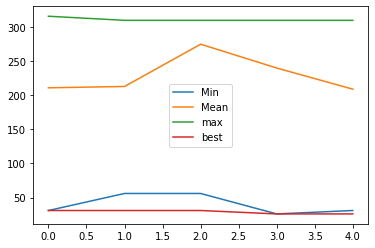

In [101]:
costs,pheromones = openFile('job1.assign')
alpha=2
beta=3
bestCost,bestPath,lastPheromones,df = run(antCount=8,evapRate=10,pherAddRate=1,iters=5)
print(f'bestCost:{bestCost}')
print(f'bestPath:{bestPath}')

so what is convergence? i realy want to check if the phromons are put in right order rather than the best variable that shows ants best answer. this is something that i not expect at all that ant's convergence is more than the mean or best. we see this in next test cases too.

on iterration 0: best->586,convergence->5337
on iterration 5: best->577,convergence->4781
on iterration 10: best->438,convergence->5122
on iterration 15: best->381,convergence->4611
bestCost:345
bestPath:[67 11 10 74 28 81 95 57 22 43 21 30 87 97  1 25  0 60 35 26 19 72 89 24
  5  9 64 88 92 46 58 77 50 98  7 85 42 29 13 71 79 18 86 48 12  3 27 99
 84 52 32 82 36 20 54 16 41 37 38 39 53 14 66 59 93 65 73 68 55 90 63 94
 70 96 76  4 69  2 33 56 51 80 91 17 83  8 47 49 31 44 62  6 61 40 78 45
 34 23 15 75]


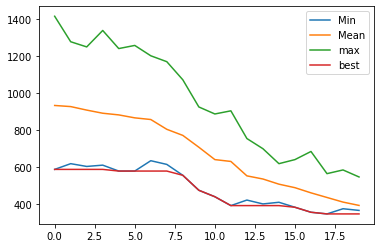

In [104]:
costs,pheromones = openFile('job2.assign')
alpha=2
beta=2
bestCost,bestPath,lastPheromones,df = run(antCount=90,evapRate=40,pherAddRate=1,iters=20)
print(f'bestCost:{bestCost}')
print(f'bestPath:{bestPath}')

on iterration 0: best->465,convergence->5241
on iterration 3: best->410,convergence->4806
on iterration 6: best->386,convergence->5221
on iterration 9: best->379,convergence->4639
on iterration 12: best->359,convergence->4930
on iterration 15: best->326,convergence->4839
on iterration 18: best->326,convergence->4962
bestCost:326
bestPath:[90 89 10 74 28 44 60 57 22 43 21 30 87 97 12 84  0 23 29 26 19 72 31 24
  5  9 67 91 92 46 64 77 17 98 75 35 42 55 13 71 79 18 86 48 78  3 27 99
 95 25 82 45 88 54 58 50 41 37 38 52 53 56 66 59 47 65 39 62 83  4 63 94
 70 96 76 68 69  2 33 20 51 80 16 36 40  8  7 49 32 73 81  6 11  1 85 15
 34 61 14 93]


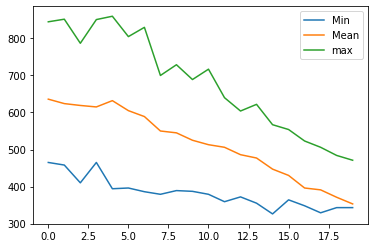

In [61]:
costs,pheromones = openFile('job2.assign')
alpha=2
beta=3
bestCost,bestPath,lastPheromones,df = run(antCount=90,evapRate=40,pherAddRate=1,iters=20)
print(f'bestCost:{bestCost}')
print(f'bestPath:{bestPath}')

on iterration 0: best->414,convergence->5186
on iterration 10: best->336,convergence->5146
on iterration 20: best->311,convergence->4930
bestCost:311
bestPath:[90 11 10 74 28 44 49 56 22 43 21 30 87 97 86 84  0 60 29 26  5 72 31 24
 75 19 67 88 92 46  9 77 50 53  7 35 42 95 13 71 79 18 32 69 12  3 27 99
 34 25 82 39 36 54 58 89 41 37 38 52 59 14 66 81  8 65 45 62 55  4 63 94
 70 96 76 23 83 68 33 20 51 80 91 48 40 98 47 16 78 73 17  6 61  1 85 57
  2 64 15 93]


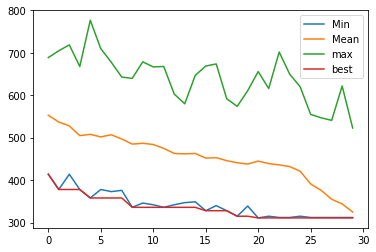

In [82]:
costs,pheromones = openFile('job2.assign')
alpha=1
beta=4
bestCost,bestPath,lastPheromones,df = run(antCount=90,evapRate=40,pherAddRate=100,iters=30)
print(f'bestCost:{bestCost}')
print(f'bestPath:{bestPath}')

In [108]:
a = '''[  8  89  93  78  14 104 122  15  21  40 110  86 172 195 115  66  83  11
  27  42  77  45 140 106  41 149 125   3  94  87 147  16 175  23 179 161
  30 142 146 170 159  32 183  56  34  58  18 160  92  68  72 157 112  90
 105  39  13 193 113 197 109  95 116  52  62 165 131  55 114  44 103  73
  64  29 194  82 181  31  88   4 101 196 108  26  50 190  85  28  65 163
  12 198 154   6 173  53 166 178  80 189 102  25  61  35 136 148 182  63
 138 176 139 124  84  24 120   0 171  19 156  81  47 191  37 192 126  51
 137  48 132 174  71 143  67   2 117  57 169   1 144 145  17   7 186 180
 135 184  98  54  22 130  36 187  75  69 168 162  46  97 118  76 127 129
 134 121  43 177 100  79 150  99 155 123  20 119  96  70 167 128  91 164
 151  10   9  33 185 199 152 107 158   5  74  49 141  59  38 111 188 153
 133  60]'''

print(list(map(int,a[1:-1].split())))

[8, 89, 93, 78, 14, 104, 122, 15, 21, 40, 110, 86, 172, 195, 115, 66, 83, 11, 27, 42, 77, 45, 140, 106, 41, 149, 125, 3, 94, 87, 147, 16, 175, 23, 179, 161, 30, 142, 146, 170, 159, 32, 183, 56, 34, 58, 18, 160, 92, 68, 72, 157, 112, 90, 105, 39, 13, 193, 113, 197, 109, 95, 116, 52, 62, 165, 131, 55, 114, 44, 103, 73, 64, 29, 194, 82, 181, 31, 88, 4, 101, 196, 108, 26, 50, 190, 85, 28, 65, 163, 12, 198, 154, 6, 173, 53, 166, 178, 80, 189, 102, 25, 61, 35, 136, 148, 182, 63, 138, 176, 139, 124, 84, 24, 120, 0, 171, 19, 156, 81, 47, 191, 37, 192, 126, 51, 137, 48, 132, 174, 71, 143, 67, 2, 117, 57, 169, 1, 144, 145, 17, 7, 186, 180, 135, 184, 98, 54, 22, 130, 36, 187, 75, 69, 168, 162, 46, 97, 118, 76, 127, 129, 134, 121, 43, 177, 100, 79, 150, 99, 155, 123, 20, 119, 96, 70, 167, 128, 91, 164, 151, 10, 9, 33, 185, 199, 152, 107, 158, 5, 74, 49, 141, 59, 38, 111, 188, 153, 133, 60]


in above results we can see that increasing in beta is very usefull.

on iterration 0: best->959,convergence->21322
on iterration 3: best->944,convergence->19846
on iterration 6: best->944,convergence->19227
on iterration 9: best->895,convergence->18644
on iterration 12: best->838,convergence->20451
on iterration 15: best->774,convergence->19448
on iterration 18: best->748,convergence->21529
bestCost:748
bestPath:[  8  27  93  78 174 104 129  15 126  40 110 128 158 195 115  66  83  11
 173  42  77  45 140 106  41  69  67   3  94  87 147  16 175  23  12  72
  30 142 146 170 159  32 183  56  34  58  18 160  92  68 178 157 112  90
 105  39  13 187  51  20 109  85 116  52  62 165 131  55 114 190 103  73
  64  29 194  82  86  31  88   4 101  46 108  26  50 107  10  28  65 163
 167 198 154 181  38  53 166  99  80 189  14  25  61  35 136 148 182  63
 138 176 139 113  84  24 120   0 172 133 156  81  47 191  37 192 100  48
 135  33 132 143  71 130 149   2 117  57 119   1 144 145  17   7 186 180
 137 184  98 169  22 152  36 134  19  44 171 162 141  97 118 199 127 

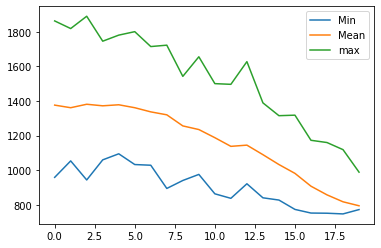

In [65]:
costs,pheromones = openFile('job3.assign')
alpha=2
beta=3
bestCost,bestPath,lastPheromones,df = run(antCount=90,evapRate=40,pherAddRate=1,iters=20)
print(f'bestCost:{bestCost}')
print(f'bestPath:{bestPath}')

on iterration 0: best->1049,convergence->18367
on iterration 3: best->979,convergence->20940
on iterration 6: best->967,convergence->21153
on iterration 9: best->885,convergence->20212
on iterration 12: best->855,convergence->19627
on iterration 15: best->732,convergence->20315
on iterration 18: best->702,convergence->20653
bestCost:702
bestPath:[  8  89  93  78  14 104 122  15  21  40 110  86 172 195 115  66  83  11
  27  42  77  45 140 106  41 149 125   3  94  87 147  16 175  23 179 161
  30 142 146 170 159  32 183  56  34  58  18 160  92  68  72 157 112  90
 105  39  13 193 113 197 109  95 116  52  62 165 131  55 114  44 103  73
  64  29 194  82 181  31  88   4 101 196 108  26  50 190  85  28  65 163
  12 198 154   6 173  53 166 178  80 189 102  25  61  35 136 148 182  63
 138 176 139 124  84  24 120   0 171  19 156  81  47 191  37 192 126  51
 137  48 132 174  71 143  67   2 117  57 169   1 144 145  17   7 186 180
 135 184  98  54  22 130  36 187  75  69 168 162  46  97 118  76 127

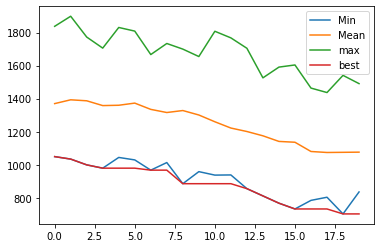

In [71]:
costs,pheromones = openFile('job3.assign')
alpha=1
beta=3
bestCost,bestPath,lastPheromones,df = run(antCount=90,evapRate=40,pherAddRate=1,iters=20)
print(f'bestCost:{bestCost}')
print(f'bestPath:{bestPath}')

on iterration 0: best->989,convergence->19217
on iterration 10: best->920,convergence->20561
on iterration 20: best->801,convergence->21039
on iterration 30: best->699,convergence->20102
bestCost:699
bestPath:[  8  89  93 176  14 104 122  15 126  40 110 128 172 195 115 174  83  11
 169  42 168  45 140 106  48 149 125   3 150  87 147  16 175  23 179  72
  30 142 146 170 159  32 183  56  34  58  18 160  92  68 194 157 112  90
  33  39  13 187 166  20 109  95 116  52  62 165 131  55 114  44 103  73
  64  29  69  82  86  31  88   4 101 196 108  26  50 190  85  28  65 107
 167 198 154 181 117  53  76 178  80 189  22  25  61  35 136 148 182  63
 138  78 139 113  84  24 120   0 171 133 156  81  47 191  37 192 188  51
 137   5 193 143  71 130  67   2 152  57 173   1 144 145  17   7 186 180
 135 184  98  54  94  99  36 134  19 111  43 162 141 163 118 199 127 129
  41 121  97 177 124  79  60  21 155 123 158 197  96  70   6 105  91 102
 151 132  12  46 185 161 164 100  10 119  74  75  77  59  38 

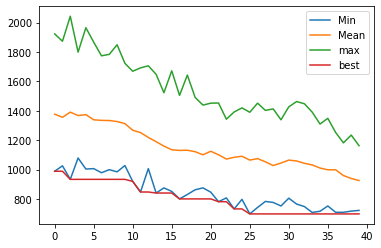

In [73]:
costs,pheromones = openFile('job3.assign')
alpha=1
beta=3
bestCost,bestPath,lastPheromones,df = run(antCount=90,evapRate=40,pherAddRate=1,iters=40)
print(f'bestCost:{bestCost}')
print(f'bestPath:{bestPath}')

on iterration 0: best->810,convergence->20138
on iterration 10: best->721,convergence->20084
on iterration 20: best->678,convergence->20879
on iterration 30: best->632,convergence->21180
bestCost:632
bestPath:[  8  89  93  78  14 104 122  15  21  40 110  86 158 195 115  66  83  11
  27  42  77  45 140 106  48  69 125   3  94  87 147  16 175  23 179  72
  30 142 146 170 159  32 183  56  34  58  18 160  92  68 178 132 112  90
  33  39  13 187 113  20 109  85 116  52  62 165 131  55 114 190 103  31
  64  29 194  82 181  81  88   4 101  46 108  26  50 107  73  28  65 163
 168 198 154   6 117  53 166  99  80 189  22  74  61  35 136 177 182  63
 138 176 139 124  84  24 120  67 172 133 156  41  47 191  37 192 126  51
 137   5 193 174  71 143 149   2 141  57 173  38 144 145  17   7 186 180
 135 184  98 169  25 152 157 134  19  44  36 162 119   0 118  76   1 129
  59 121  43 128 196  79 150  49 155 123 127 197  96  70 148 105  91 102
 151 171  12 167 185 161 164 100  10 188 130  75  54 199   9 

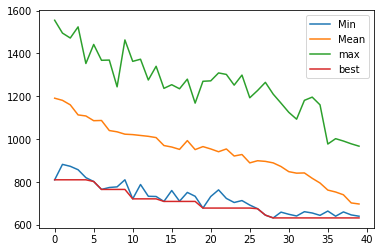

In [74]:
costs,pheromones = openFile('job3.assign')
alpha=1
beta=3
bestCost,bestPath,lastPheromones,df = run(antCount=90,evapRate=40,pherAddRate=100,iters=40)
print(f'bestCost:{bestCost}')
print(f'bestPath:{bestPath}')

it seems that decreasing evapRate and increasing pherAddRate is usefull to not stock in local optimum

on iterration 0: best->24949,convergence->2045407
on iterration 4: best->24532,convergence->2015378
on iterration 8: best->23231,convergence->2015764
on iterration 12: best->23231,convergence->2034571
on iterration 16: best->20981,convergence->1955130
bestCost:20981
bestPath:[ 95 762 619 169 460 349 979 909 490 102 899 195 343 376 288  78 422  89
 348 175 432 459 408 879 892 744 523 369 840 199 173 528 515 822 717  51
 455 157 674 118  45 466 296 859 637 699 513 812  56 105  72  88 724  63
 740 400 200 291 754 696 562 527 813 193 850 357 588 505 358 279 249 273
 904 563 811 602  68 592 788 179 751 880 670 454 535 163 325 997 805 201
 836 764 492  40 379 753 185  60 436 276 372  16 923 702  50 171 451 725
 627 390 609 796 570 871 767 569 265 930 598 142 547  57 579 978 591 734
  94  87 861 693 316 641 795 853  91  23 920 493 191 269 600 154 976 900
 950 471 867 608 518 128 870 146  73 345 825 556  21 726 692 413 504 202
 681 239 397 947 176 395 625 959  74 760 897 958 496 534 830 218 28

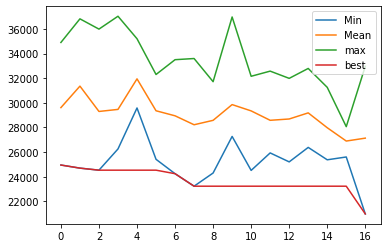

In [94]:
costs,pheromones = openFile('job4.assign')
alpha=2
beta=4
bestCost,bestPath,lastPheromones,df = run(antCount=10,evapRate=3,pherAddRate=1000,iters=60)
print(f'bestCost:{bestCost}')
print(f'bestPath:{bestPath}')

on iterration 0: best->64744,convergence->7962266
bestCost:64744
bestPath:[ 433 1191 1816 ...  933 1960  488]


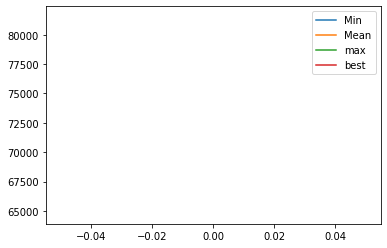

In [99]:
costs,pheromones = openFile('job5.assign')
alpha=2
beta=4
bestCost,bestPath,lastPheromones,df = run(antCount=10,evapRate=3,pherAddRate=1000,iters=1)
print(f'bestCost:{bestCost}')
print(f'bestPath:{bestPath}')
#print(lastPheromones[0])

### which techniques i use?
the program is so simple as i use oop in my code. with 'findFood' the ant try to make permutation of result. then when we call 'returnHome' the ant puts pheromons on it's way back. more best answer it find, more pheromons it's put back on the way.

also i use just the best 8 ants to put pheromons to improve the quality of path pheromons